<a href="https://colab.research.google.com/github/Herodegon/ECGR4105-Intro-to-Machine-Learning/blob/main/Assignment1_LinearRegressionUsingGradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, we will use a dataset provided: “HW1.csv” Let the first three columns of the data set be separate explanatory variables x1, x2, x3. Let the fourth column be the dependent variable Y. (Note: You cannot use the built-in function from ML libraries for gradient descent, you have to implement it yourself.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/MyDrive/ECGR4105/HW1.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
M=len(dataset)
M

100

In [3]:
dataset.head(len(dataset))

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


Problem 1 (40 points)

Develop a code that runs linear regression with a gradient descent algorithm for each of the explanatory variables in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. You need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).

1. Report the linear model you found for each explanatory variable.
2. Plot the final regression model and loss over the iteration per each explanatory variable.
3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
4. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.


In [4]:
X = dataset.iloc[:,[0,1,2]].values  # Get input values from each explanatory variable
Y = dataset.iloc[:,3].values        # Get output values
m = len(X)                          # Number of training examples
n = len(Y)                          # Number of training examples
X[0:5]

print("X1 = ", np.hstack(X[:5,0]))
print("X2 = ", np.hstack(X[:5,1]))
print("X3 = ", np.hstack(X[:5,2]))
print("Y = ", np.hstack(Y[:5]))
print("m = ", m)
print("n = ", n)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


Included below are graphs of the training data that will be used for the linear regression of X1, X2, and X3 respectively.

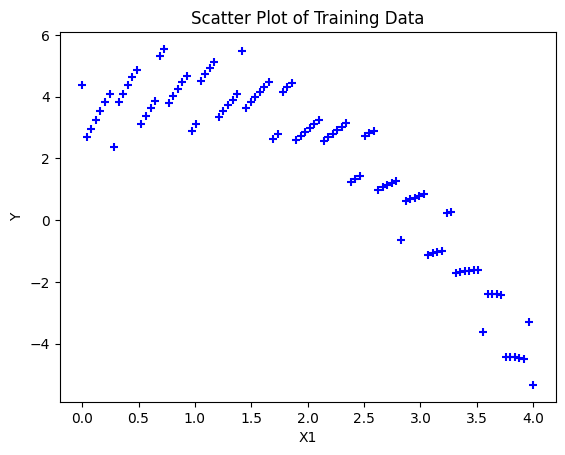

In [5]:
def GenerateScatter(X,Y,x_label,y_label,color):
  # Scatter plot
  plt.scatter(X, Y, color=color, marker='+')

  # Grid, labels, and title
  # plt.grid(True)
  plt.rcParams["figure.figsize"] = (5, 5)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title('Scatter Plot of Training Data')

  # Show the plot
  plt.show()
  return

GenerateScatter(X[:,0],Y,'X1','Y','blue')

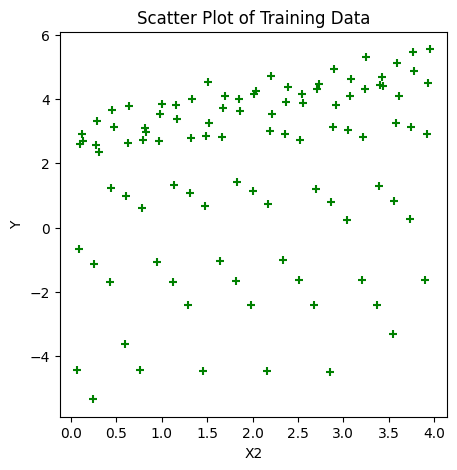

In [6]:
GenerateScatter(X[:,1],Y,'X2','Y','green')

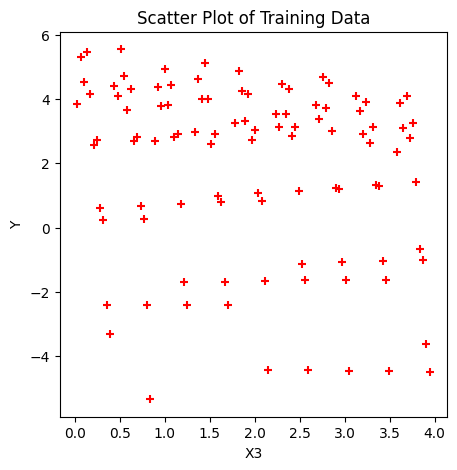

In [7]:
GenerateScatter(X[:,2],Y,'X3','Y','red')

In [8]:
# Creates a training table using input data X and stacks data together horizontally
def ConstructData(X,m):
  X_0 = np.ones((m,1))
  X_1 = X.reshape(m,1)
  data = np.hstack((X_0,X_1)) # Construct feature matrix
  return data

In [9]:
def ComputeCost(X,Y,theta):
  predictions = X.dot(theta)                  # Scales X array by current theta value
  errors = np.subtract(predictions,Y)         # Computes the difference between every element of predictions[] and Y[]
  square_errors = np.square(errors)           # Squares the resulting error
  cost = (1/(2*m))*np.sum(square_errors)      # Computes the cost equation {(1/(2*m))*(predictions[]-Y[])^2}
  return cost

def GradientDescent(X,Y,theta,alpha,iterations):
  cost_history = np.zeros(iterations)         # Initializes empty array of size "iterations"
  for i in range(iterations):
    predictions = X.dot(theta)                # Scales X array by current theta value
    errors = np.subtract(predictions,Y)       # Computes the difference between every element of predictions[] and Y[]
    sum_delta = (alpha/m)*X.T.dot(errors)     # Solves for the sum of delta functions (errors)
    theta = theta - sum_delta                 # New theta is found by taking the difference between current value and solved delta value
    cost_history[i] = ComputeCost(X,Y,theta)  # Computes the cost for the current theta value
  return theta, cost_history

In [10]:
# Construct Tables For Use in Linear Regression
X1 = ConstructData(X[:,0],m)
X2 = ConstructData(X[:,1],m)
X3 = ConstructData(X[:,2],m)

In [11]:
theta = np.zeros(np.shape(X1)[1])
# Cost based on current theta values
print("Cost(X1) = ", ComputeCost(X1,Y,theta))

Cost(X1) =  5.524438459196242


In [12]:
iterations = 1000
X_Value = np.empty((m,1))
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((3,len(alpha_values),len(theta)))           # Construct 3D-array to hold each pair of theta values for every alpha and X
cost_values = np.zeros((3,len(alpha_values),iterations))            # Construct 3D-array to hold each set of cost history for every alpha and X
for i in range(0,3):
  match i:
    case 0:
      X_value = X1
    case 1:
      X_value = X2
    case 2:
      X_value = X3
  j = 0
  for alpha in alpha_values:
    theta = theta_values[i,j]
    theta, cost_history = GradientDescent(X_value,Y,theta,alpha,iterations)
    print("Theta ",i, ':',j," = ",theta)
    theta_values[i,j] = theta
    cost_values[i,j] = cost_history
    j = j+1
print("Finished Computation")

Theta  0 : 0  =  [ 5.29294728 -1.79119079]
Theta  0 : 1  =  [ 5.85920847 -2.0115825 ]
Theta  0 : 2  =  [ 5.92054437 -2.03545475]
Theta  0 : 3  =  [ 5.92715528 -2.03802775]
Theta  0 : 4  =  [ 5.92786428 -2.03830369]
Theta  0 : 5  =  [ 5.92793994 -2.03833314]
Theta  0 : 6  =  [ 5.92794797 -2.03833626]
Theta  0 : 7  =  [ 5.92794882 -2.03833659]
Theta  0 : 8  =  [ 5.92794891 -2.03833663]
Theta  0 : 9  =  [ 5.92794892 -2.03833663]
Theta  1 : 0  =  [0.68701995 0.57669462]
Theta  1 : 1  =  [0.73075123 0.559674  ]
Theta  1 : 2  =  [0.73548849 0.55783022]
Theta  1 : 3  =  [0.73599912 0.55763147]
Theta  1 : 4  =  [0.73605389 0.55761016]
Theta  1 : 5  =  [0.73605974 0.55760788]
Theta  1 : 6  =  [0.73606036 0.55760764]
Theta  1 : 7  =  [0.73606042 0.55760761]
Theta  1 : 8  =  [0.73606043 0.55760761]
Theta  1 : 9  =  [0.73606043 0.55760761]
Theta  2 : 0  =  [ 2.59118664 -0.40965135]
Theta  2 : 1  =  [ 2.84205985 -0.50887028]
Theta  2 : 2  =  [ 2.86836127 -0.51927234]
Theta  2 : 3  =  [ 2.87110466 -

Now that the theta values and cost history has been compiled for each combination of X and alpha, the next step is to find which pair of theta values yielded the lowest cost. Once that pair has been found, the best possible model can be constructed and graphed.

In [13]:
def PlotLinearRegression(X,Y,theta,x_label,y_label):
  plt.scatter(X[:,1], Y, color='b', marker= '+', label= 'Training Data')
  plt.plot(X[:,1],X.dot(theta), color='r', label='Linear Regression')     # Construct best-fit line using theta values determined by training
  plt.rcParams["figure.figsize"] = (6,4)

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title('Linear Regression Using 2 Variables')
  plt.legend()

  # Print final graph
  plt.show()
  return

def PlotLoss(cost_values,iterations,x_label,y_label):
  plt.plot(range(iterations),cost_values, color='b', label= 'Loss')

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title('Loss Over Iterations')

  # Print final graph
  plt.show()
  return

# Find minimum value from cost history
def FindMinCost(cost_values):
  cost_min = cost_values[0,0,0]
  cost_index = np.zeros((1,2))
  for i in range(0,np.shape(cost_values)[0]):
    for j in range(0,np.shape(cost_values)[1]):
      test_min = np.min(cost_values[i,j])
      if test_min < cost_min:
        cost_min = test_min
        cost_index = np.array([i,j])
  return cost_min, cost_index

cost_min,cost_index = FindMinCost(cost_values)


1. Report the linear model you found for each explanatory variable

In [14]:
print("X1: Y_hat = ", theta_values[cost_index[0],cost_index[1],0], " + ", theta_values[cost_index[0],cost_index[1],1],"x1")
print("X2: Y_hat = ", theta_values[1,9,0], " + ", theta_values[1,9,1],"x1")
print("X3: Y_hat = ", theta_values[2,9,0], " + ", theta_values[2,9,1],"x1")

X1: Y_hat =  5.927948907650669  +  -2.038336629598814 x1
X2: Y_hat =  0.736060430011125  +  0.5576076103651677 x1
X3: Y_hat =  2.871422103633952  +  -0.5204828841600001 x1


2. Plot the final regression model and loss over the iteration per each explanatory variable

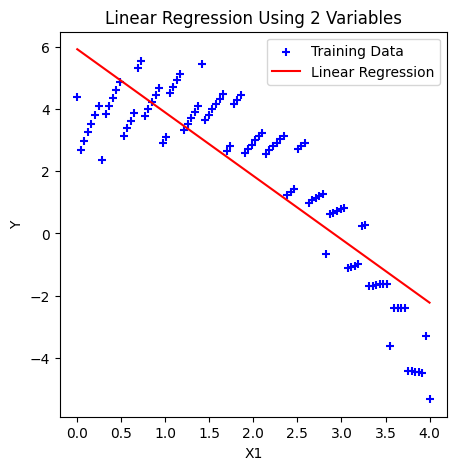

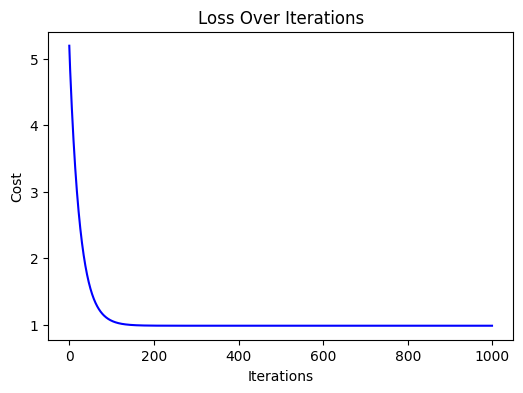

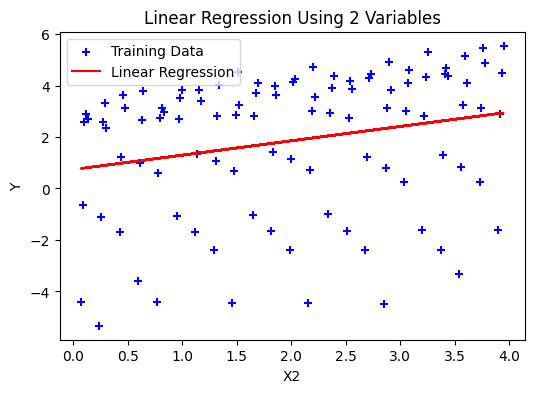

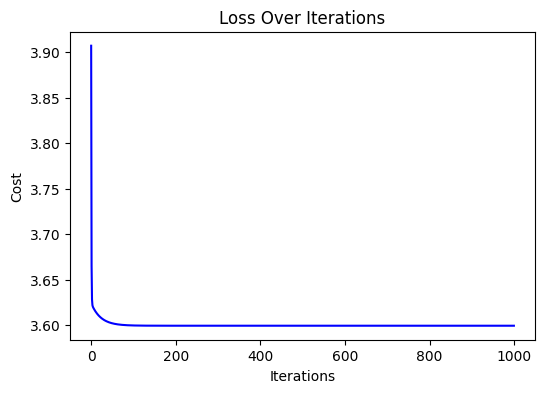

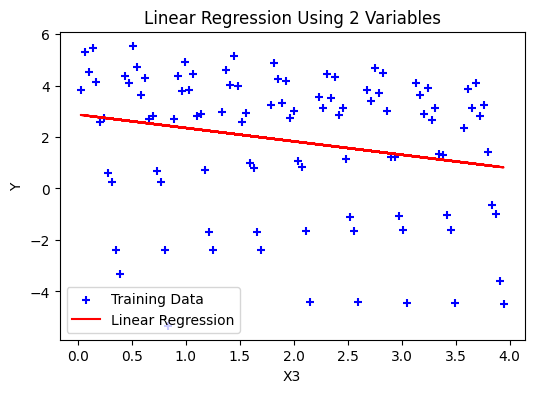

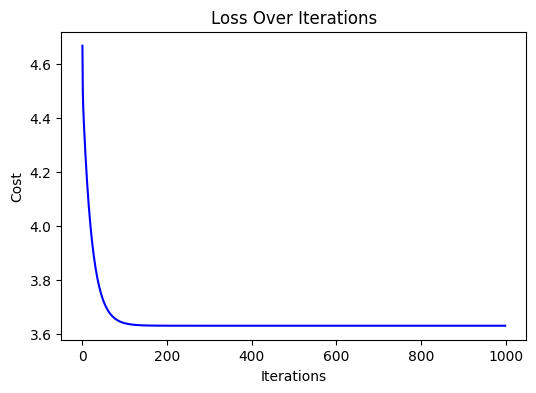

In [15]:
PlotLinearRegression(X1,Y,theta_values[cost_index[0],cost_index[1]],"X1","Y")
PlotLoss(cost_values[cost_index[0],cost_index[1]],iterations,"Iterations","Cost")
PlotLinearRegression(X2,Y,theta_values[1,9], "X2","Y")
PlotLoss(cost_values[1,9],iterations,"Iterations","Cost")
PlotLinearRegression(X3,Y,theta_values[2,9], "X3","Y")
PlotLoss(cost_values[2,9],iterations,"Iterations","Cost")

3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?

In [16]:
print("Cost Min = ",cost_min)
print("Cost Index = ",cost_index)

Cost Min =  0.9849930825405943
Cost Index =  [0 8]


Using the algorithm for finding minimum cost demonstrated above, we can see that the lowest cost is found using X1. Thus, X1 is the best explanatory variable for describing the output with the least amount of loss.

4. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.

Lower learning rates (hereby after refered to as alpha values) offer worse lost using training data than higher alpha values do. That said, by increasing the number of training iterations we can see better, or sometimes the best possible cost value found at lower alpha values. There are diminishing returns on the number of iterations used, so these should be used in tandem with lower alpha rates to quickly find the best cost.

Problem 2 (60 points)

This time, run linear regression with a gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

In [17]:
# Creates a training table using input data X and stacks data together horizontally
X_0 = np.ones((m,1))
X_1 = X[:,0].reshape(m,1)
X_2 = X[:,1].reshape(m,1)
X_3 = X[:,2].reshape(m,1)
X_feature = np.hstack((X_0,X_1,X_2,X_3)) # Construct feature matrix
X_feature[0:5]
theta = np.zeros(np.shape(X_feature)[1])

In [23]:
iterations = 1000
alpha_values = np.arange(0.01,0.11,0.01)
theta_values = np.zeros((1,len(alpha_values),len(theta)))           # Construct 3D-array to hold each pair of theta values for every alpha and X
cost_values = np.zeros((1,len(alpha_values),iterations))            # Construuct 3D-array to hold each set of cost history for every alpha and X
j = 0
for alpha in alpha_values:
  theta = theta_values[0,j]
  theta, cost_history = GradientDescent(X_feature,Y,theta,alpha,iterations)
  print("Theta ",i, ':',j," = ",theta)
  theta_values[0,j] = theta
  cost_values[0,j] = cost_history
  j = j+1
print("Finished Computation")

Theta  2 : 0  =  [ 3.39929705 -1.73320582  0.84898275  0.0150737 ]
Theta  2 : 1  =  [ 4.60854423 -1.90403835  0.64916316 -0.16217188]
Theta  2 : 2  =  [ 5.05440685 -1.96702382  0.57548712 -0.22752628]
Theta  2 : 3  =  [ 5.21863739 -1.99022411  0.54834904 -0.25159914]
Theta  2 : 4  =  [ 5.27907019 -1.99876124  0.53836289 -0.26045736]
Theta  2 : 5  =  [ 5.30128572 -2.00189955  0.53469192 -0.26371371]
Theta  2 : 6  =  [ 5.30944412 -2.00305206  0.53334379 -0.26490956]
Theta  2 : 7  =  [ 5.31243718 -2.00347488  0.53284921 -0.26534828]
Theta  2 : 8  =  [ 5.31353414 -2.00362984  0.53266794 -0.26550908]
Theta  2 : 9  =  [ 5.31393577 -2.00368658  0.53260157 -0.26556795]
Finished Computation


In [21]:
cost_min, cost_index = FindMinCost(cost_values)
print("Cost Min = ",cost_min)
print("Cost Index = ",cost_index)

Cost Min =  0.7384642444206544
Cost Index =  [0 9]


1. Report the final linear model you found best

In [19]:
theta = theta_values[0,9]
print("Y_hat = ",theta[0], " + ", theta[1],"x1 + ", theta[2],"x2 + ", theta[3],"x3")

Y_hat =  5.313935769531634  +  -2.0036865792753904 x1 +  0.5326015740310899 x2 +  -0.2655679465553415 x3


2. Plot loss over iteration

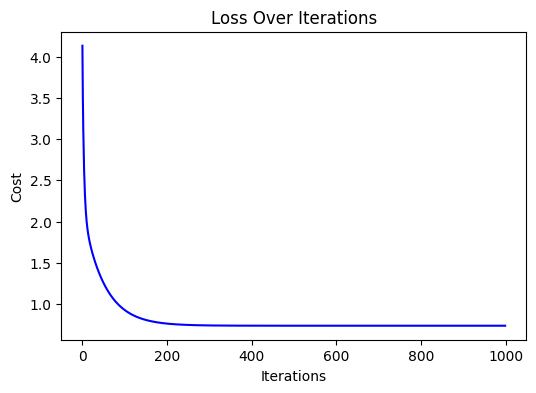

In [20]:
PlotLoss(cost_values[0,9],iterations,"Iterations","Cost")

3. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.

Similar to the last one, the training rate (alpha) gives worse returns at lower values when paired with a lower number of training iterations. However, unlike the previous problem it takes much longer for the algorithm to reach the lowest cost when using several explanatory variables at the same time. Therefore, the best approach would likely be to pair a high iteration count with a middling alpha value to increase the productivity of the algorithm.

4. Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

In [25]:
def PredictOutput(theta,x1,x2,x3):
  output = theta[0]+(theta[1]*x1)+(theta[2]*x2)+(theta[3]*x3)
  return output

theta = theta_values[0,9]
print("Given (1,1,1), Y_hat = ",PredictOutput(theta,1,1,1))
print("Given (2,0,4), Y_hat = ",PredictOutput(theta,2,0,4))
print("Given (3,2,1), Y_hat = ",PredictOutput(theta,3,2,1))

Given (1,1,1), Y_hat =  3.5772828177319917
Given (2,0,4), Y_hat =  0.24429082475948705
Given (3,2,1), Y_hat =  0.10251123321230088
